# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

/Users/ikramabbas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Initializing Arbeitnow scraper...
STARTING JOB COLLECTION
Fetching page 1...
✓ Retrieved 100 jobs from page 1
Total jobs collected: 100
Fetching page 2...
✓ Retrieved 100 jobs from page 2
Total jobs collected: 200
Fetching page 3...
✓ Retrieved 100 jobs from page 3
Total jobs collected: 300
Fetching page 4...
✓ Retrieved 100 jobs from page 4
Total jobs collected: 400
Fetching page 5...
✓ Retrieved 100 jobs from page 5
Total jobs collected: 500

✓ Collection complete! Total jobs: 500

Dataset shape: (500, 11)
Columns: ['slug', 'company_name', 'title', 'description', 'remote', 'url', 'tags', 'job_types', 'location', 'created_at', 'scraped_at']

SAMPLE JOB LISTINGS
                                               title  \
0            Senior Software Engineer, Android - KMP   
1                                Senior iOS Engineer   
2          Workforce Management Global Intraday Lead   
3         Software-Tester Qualitätssicherung (m/w/d)   
4        Finanzbuchhalter (m/w/d) Wirtschaftsprüf

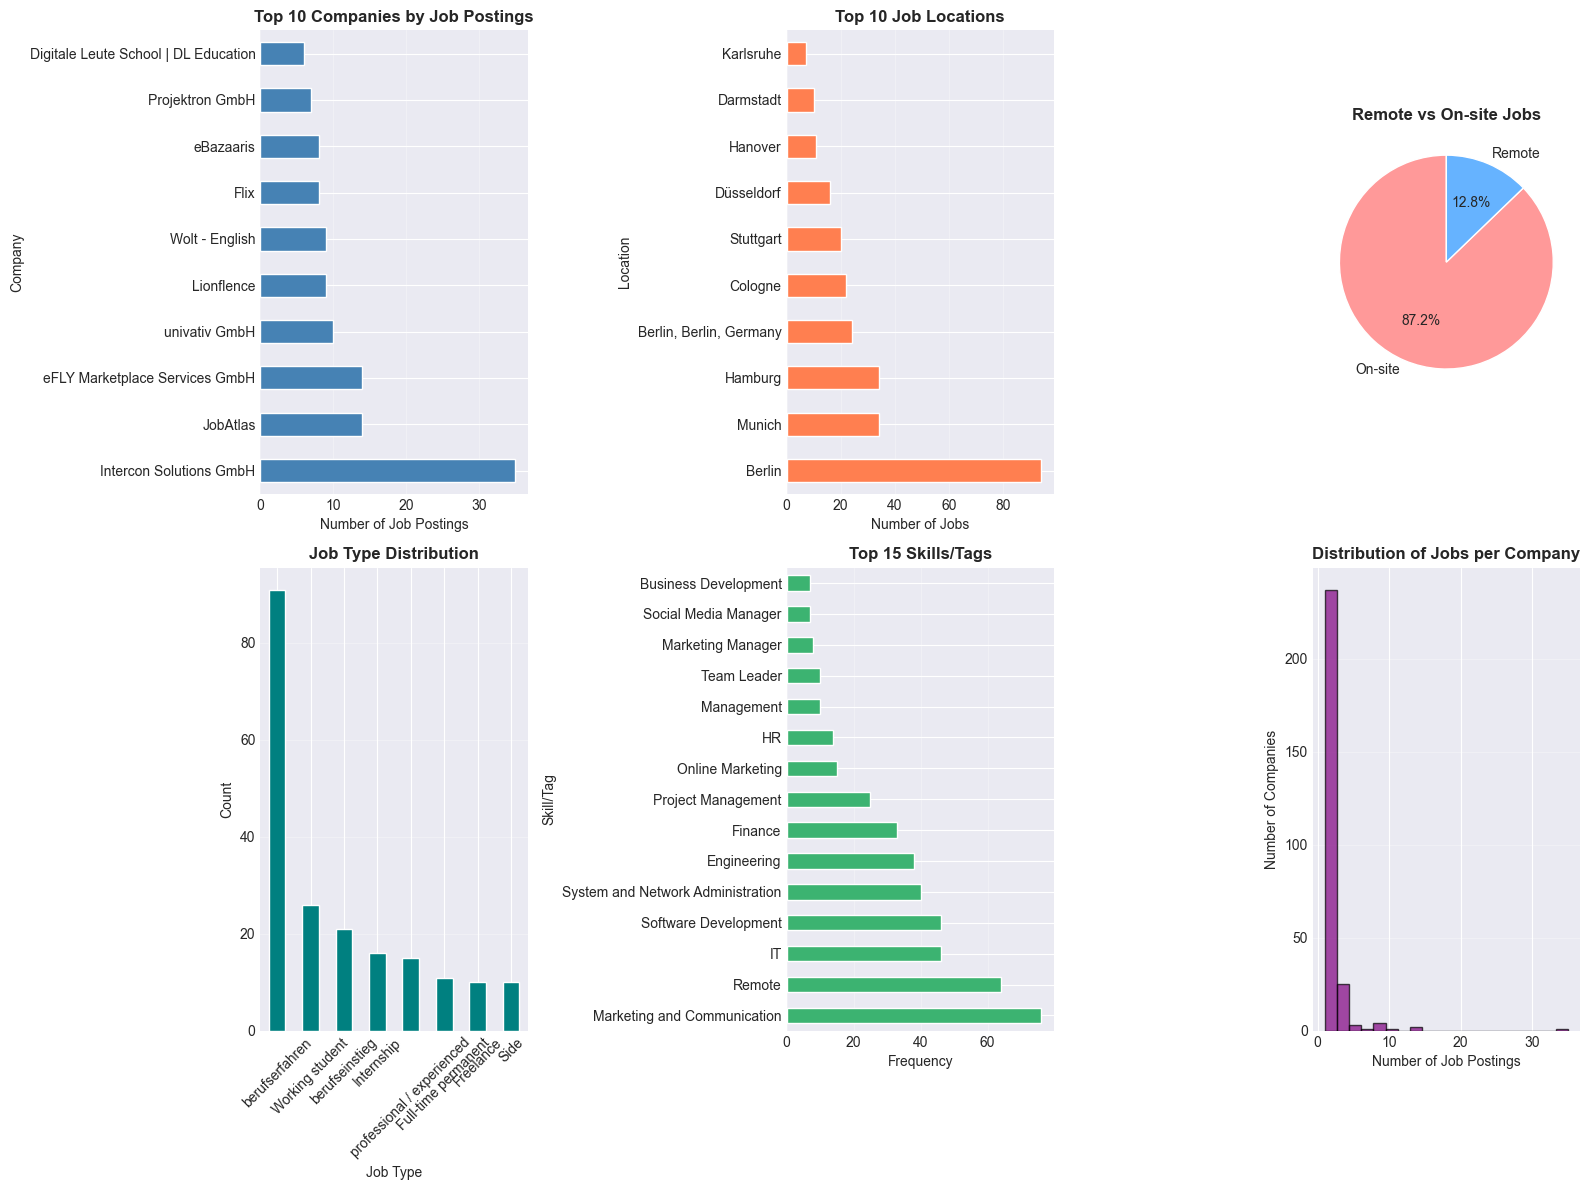


✓ Visualizations generated and saved

SPECIAL FEATURES ANALYSIS

Jobs mentioning Visa Sponsorship: 2

Companies offering Visa Sponsorship:
company_name
Paymentology    1
L1VE GmbH       1
Name: count, dtype: int64

Jobs mentioning 4-Day Work Week: 2

Jobs with Salary Information: 176 (35.2%)

KEY INSIGHTS

📊 Total Jobs Analyzed: 500
🏢 Unique Companies: 274
🔝 Most Active Company: Intercon Solutions GmbH (35 jobs)
🌍 Unique Locations: 127
📍 Top Location: Berlin (94 jobs)
💻 Remote Jobs: 64 (12.8%)
🏷️ Average Tags per Job: 1.2

✓ Full dataset saved to 'arbeitnow_jobs_full.csv'
✓ Remote jobs (64) saved to 'arbeitnow_remote_jobs.csv'
✓ Visa sponsorship jobs (2) saved to 'arbeitnow_visa_jobs.csv'
✓ Summary saved to 'scraping_summary.json'

🎉 SCRAPING & ANALYSIS COMPLETE!


In [1]:
# Arbeitnow Job Board Scraper & Analysis
# Complete solution for scraping and analyzing job data

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import json
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

class ArbeitnowScraper:
    """Scraper for Arbeitnow job board using their API"""

    def __init__(self):
        self.base_url = "https://www.arbeitnow.com/api/job-board-api"
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }
        self.jobs = []

    def fetch_jobs(self, page=1):
        """Fetch jobs from a specific page"""
        try:
            url = f"{self.base_url}?page={page}"
            print(f"Fetching page {page}...")

            response = requests.get(url, headers=self.headers)

            if response.status_code == 200:
                data = response.json()
                jobs = data.get('data', [])
                print(f"✓ Retrieved {len(jobs)} jobs from page {page}")
                return jobs, data.get('links', {})
            else:
                print(f"✗ Error: Status code {response.status_code}")
                return [], {}

        except Exception as e:
            print(f"✗ Error fetching page {page}: {str(e)}")
            return [], {}

    def fetch_all_jobs(self, max_pages=10):
        """Fetch all available jobs with pagination"""
        print("=" * 60)
        print("STARTING JOB COLLECTION")
        print("=" * 60)

        all_jobs = []
        page = 1

        while page <= max_pages:
            jobs, links = self.fetch_jobs(page)

            if not jobs:
                print(f"No more jobs found. Stopping at page {page}")
                break

            all_jobs.extend(jobs)
            print(f"Total jobs collected: {len(all_jobs)}")

            # Check if there's a next page
            if not links.get('next'):
                print("Reached last page")
                break

            page += 1
            time.sleep(1)  # Be respectful to the server

        self.jobs = all_jobs
        print(f"\n✓ Collection complete! Total jobs: {len(all_jobs)}")
        return all_jobs

    def to_dataframe(self):
        """Convert jobs to pandas DataFrame"""
        if not self.jobs:
            print("No jobs to convert. Run fetch_all_jobs() first.")
            return pd.DataFrame()

        df = pd.DataFrame(self.jobs)

        # Add collection timestamp
        df['scraped_at'] = datetime.now()

        return df

# %% Initialize and fetch data
print("Initializing Arbeitnow scraper...")
scraper = ArbeitnowScraper()

# Fetch jobs (adjust max_pages as needed)
jobs = scraper.fetch_all_jobs(max_pages=5)

# Convert to DataFrame
df = scraper.to_dataframe()

print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# %% Display sample data
print("\n" + "=" * 60)
print("SAMPLE JOB LISTINGS")
print("=" * 60)

if not df.empty:
    display_cols = ['title', 'company_name', 'location', 'job_types', 'remote']
    available_cols = [col for col in display_cols if col in df.columns]
    print(df[available_cols].head(10))

# %% Data Exploration
print("\n" + "=" * 60)
print("DATA OVERVIEW")
print("=" * 60)

print(f"\nTotal job listings: {len(df)}")
print(f"\nColumn names:\n{list(df.columns)}")

# Check data types
print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df.dtypes)

# Missing values
print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

# %% Data Processing

# Extract useful information
if 'tags' in df.columns:
    # Count tags
    df['num_tags'] = df['tags'].apply(lambda x: len(x) if isinstance(x, list) else 0)

if 'job_types' in df.columns:
    # Extract job types
    df['job_type_list'] = df['job_types'].apply(lambda x: x if isinstance(x, list) else [])
    df['num_job_types'] = df['job_type_list'].apply(len)

if 'remote' in df.columns:
    # Ensure remote is boolean
    df['is_remote'] = df['remote'].astype(bool)

# Extract visa sponsorship info from description or tags
if 'description' in df.columns:
    df['mentions_visa'] = df['description'].str.contains(
        'visa|sponsorship', case=False, na=False
    )

# %% Statistical Analysis

print("\n" + "=" * 60)
print("JOB MARKET ANALYSIS")
print("=" * 60)

# Company statistics
if 'company_name' in df.columns:
    print("\nTop 10 Companies by Job Postings:")
    print(df['company_name'].value_counts().head(10))

# Location statistics
if 'location' in df.columns:
    print("\nTop 10 Locations:")
    print(df['location'].value_counts().head(10))

# Remote work statistics
if 'is_remote' in df.columns:
    remote_pct = (df['is_remote'].sum() / len(df)) * 100
    print(f"\nRemote Opportunities: {df['is_remote'].sum()} ({remote_pct:.1f}%)")

# Job type statistics
if 'job_types' in df.columns:
    print("\nJob Types Distribution:")
    all_job_types = []
    for types in df['job_type_list']:
        all_job_types.extend(types)
    job_type_series = pd.Series(all_job_types)
    print(job_type_series.value_counts())

# Tag analysis
if 'tags' in df.columns:
    print("\nMost Common Tags:")
    all_tags = []
    for tags in df['tags']:
        if isinstance(tags, list):
            all_tags.extend(tags)
    tag_series = pd.Series(all_tags)
    print(tag_series.value_counts().head(15))

# %% Visualizations

fig = plt.figure(figsize=(16, 12))

# 1. Top Companies
if 'company_name' in df.columns:
    ax1 = plt.subplot(2, 3, 1)
    top_companies = df['company_name'].value_counts().head(10)
    top_companies.plot(kind='barh', color='steelblue', ax=ax1)
    ax1.set_xlabel('Number of Job Postings', fontsize=10)
    ax1.set_ylabel('Company', fontsize=10)
    ax1.set_title('Top 10 Companies by Job Postings', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')

# 2. Top Locations
if 'location' in df.columns:
    ax2 = plt.subplot(2, 3, 2)
    top_locations = df['location'].value_counts().head(10)
    top_locations.plot(kind='barh', color='coral', ax=ax2)
    ax2.set_xlabel('Number of Jobs', fontsize=10)
    ax2.set_ylabel('Location', fontsize=10)
    ax2.set_title('Top 10 Job Locations', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')

# 3. Remote vs On-site
if 'is_remote' in df.columns:
    ax3 = plt.subplot(2, 3, 3)
    remote_counts = df['is_remote'].value_counts()
    colors = ['#ff9999', '#66b3ff']
    labels = ['On-site', 'Remote'] if False in remote_counts.index else ['Remote']
    ax3.pie(remote_counts.values, labels=labels, autopct='%1.1f%%',
            colors=colors, startangle=90)
    ax3.set_title('Remote vs On-site Jobs', fontsize=12, fontweight='bold')

# 4. Top Job Types
if 'job_type_list' in df.columns:
    ax4 = plt.subplot(2, 3, 4)
    all_job_types = []
    for types in df['job_type_list']:
        all_job_types.extend(types)
    job_type_counts = pd.Series(all_job_types).value_counts().head(8)
    job_type_counts.plot(kind='bar', color='teal', ax=ax4)
    ax4.set_xlabel('Job Type', fontsize=10)
    ax4.set_ylabel('Count', fontsize=10)
    ax4.set_title('Job Type Distribution', fontsize=12, fontweight='bold')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3, axis='y')

# 5. Top Skills/Tags
if 'tags' in df.columns:
    ax5 = plt.subplot(2, 3, 5)
    all_tags = []
    for tags in df['tags']:
        if isinstance(tags, list):
            all_tags.extend(tags)
    top_tags = pd.Series(all_tags).value_counts().head(15)
    top_tags.plot(kind='barh', color='mediumseagreen', ax=ax5)
    ax5.set_xlabel('Frequency', fontsize=10)
    ax5.set_ylabel('Skill/Tag', fontsize=10)
    ax5.set_title('Top 15 Skills/Tags', fontsize=12, fontweight='bold')
    ax5.grid(True, alpha=0.3, axis='x')

# 6. Jobs per Company Distribution
if 'company_name' in df.columns:
    ax6 = plt.subplot(2, 3, 6)
    company_counts = df['company_name'].value_counts()
    ax6.hist(company_counts.values, bins=20, color='purple', alpha=0.7, edgecolor='black')
    ax6.set_xlabel('Number of Job Postings', fontsize=10)
    ax6.set_ylabel('Number of Companies', fontsize=10)
    ax6.set_title('Distribution of Jobs per Company', fontsize=12, fontweight='bold')
    ax6.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('arbeitnow_job_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizations generated and saved")

# %% Special Features Analysis

print("\n" + "=" * 60)
print("SPECIAL FEATURES ANALYSIS")
print("=" * 60)

# Visa Sponsorship
if 'mentions_visa' in df.columns:
    visa_jobs = df[df['mentions_visa'] == True]
    print(f"\nJobs mentioning Visa Sponsorship: {len(visa_jobs)}")
    if len(visa_jobs) > 0:
        print("\nCompanies offering Visa Sponsorship:")
        print(visa_jobs['company_name'].value_counts().head(10))

# 4-Day Work Week (if detectable in description)
if 'description' in df.columns:
    df['mentions_4day'] = df['description'].str.contains(
        '4 day|four day|4-day|four-day', case=False, na=False
    )
    four_day_jobs = df[df['mentions_4day'] == True]
    print(f"\nJobs mentioning 4-Day Work Week: {len(four_day_jobs)}")

# Salary Information
if 'description' in df.columns:
    df['mentions_salary'] = df['description'].str.contains(
        'salary|€|EUR|compensation', case=False, na=False
    )
    salary_jobs = df[df['mentions_salary'] == True]
    salary_pct = (len(salary_jobs) / len(df)) * 100
    print(f"\nJobs with Salary Information: {len(salary_jobs)} ({salary_pct:.1f}%)")

# %% Key Insights

print("\n" + "=" * 60)
print("KEY INSIGHTS")
print("=" * 60)

print(f"\n📊 Total Jobs Analyzed: {len(df)}")

if 'company_name' in df.columns:
    print(f"🏢 Unique Companies: {df['company_name'].nunique()}")
    print(f"🔝 Most Active Company: {df['company_name'].value_counts().index[0]} "
          f"({df['company_name'].value_counts().values[0]} jobs)")

if 'location' in df.columns:
    print(f"🌍 Unique Locations: {df['location'].nunique()}")
    print(f"📍 Top Location: {df['location'].value_counts().index[0]} "
          f"({df['location'].value_counts().values[0]} jobs)")

if 'is_remote' in df.columns:
    remote_pct = (df['is_remote'].sum() / len(df)) * 100
    print(f"💻 Remote Jobs: {df['is_remote'].sum()} ({remote_pct:.1f}%)")

if 'tags' in df.columns and 'num_tags' in df.columns:
    print(f"🏷️ Average Tags per Job: {df['num_tags'].mean():.1f}")

# %% Export Data

# Save full dataset
df.to_csv('arbeitnow_jobs_full.csv', index=False)
print("\n✓ Full dataset saved to 'arbeitnow_jobs_full.csv'")

# Save remote jobs only
if 'is_remote' in df.columns:
    remote_jobs = df[df['is_remote'] == True]
    remote_jobs.to_csv('arbeitnow_remote_jobs.csv', index=False)
    print(f"✓ Remote jobs ({len(remote_jobs)}) saved to 'arbeitnow_remote_jobs.csv'")

# Save visa sponsorship jobs
if 'mentions_visa' in df.columns:
    visa_jobs = df[df['mentions_visa'] == True]
    if len(visa_jobs) > 0:
        visa_jobs.to_csv('arbeitnow_visa_jobs.csv', index=False)
        print(f"✓ Visa sponsorship jobs ({len(visa_jobs)}) saved to 'arbeitnow_visa_jobs.csv'")

# Save summary statistics
summary = {
    'total_jobs': int(len(df)),
    'unique_companies': int(df['company_name'].nunique()) if 'company_name' in df.columns else 0,
    'unique_locations': int(df['location'].nunique()) if 'location' in df.columns else 0,
    'remote_jobs': int(df['is_remote'].sum()) if 'is_remote' in df.columns else 0,
    'scraped_at': datetime.now().isoformat()
}

with open('scraping_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)
print("✓ Summary saved to 'scraping_summary.json'")

print("\n" + "=" * 60)
print("🎉 SCRAPING & ANALYSIS COMPLETE!")
print("=" * 60)